Given a bank customer, build a neural network-based classifier that can determine whetherthey will leave or not in the next 6 months.
Dataset Description: The case study is from an open-source dataset from Kaggle.The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc. Link to the Kaggle project: https://www.kaggle.com/barelydedicated/bank-customer-churn- modeling Perform following steps:

1)Read the dataset.
2)Distinguish the feature and target set and divide the data set into training and test sets.
3)Normalize the train and test data.
4)Initialize and build the model. Identify the points of improvement and implement the same. Print the accuracy score and confusion matrix

In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
df = pd.read_csv("C:\\Users\\hp\\Downloads\\churn_modelling.csv")

In [95]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [96]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [97]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [98]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [99]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [100]:
df = df.drop(['RowNumber','CustomerId','Surname'],axis = 1)

In [101]:
def visiualize(x,y,label):
    plt.figure(figsize=(10,5))
    plt.hist([x,y],label=['exited','retained'])
    plt.xlabel(label)
    plt.ylabel("No. of Customers")
    plt.legend()

In [102]:
df_tenure_exited = df[df['Exited']==1]['Tenure']
df_tenure_Noexited = df[df['Exited']==0]['Tenure']

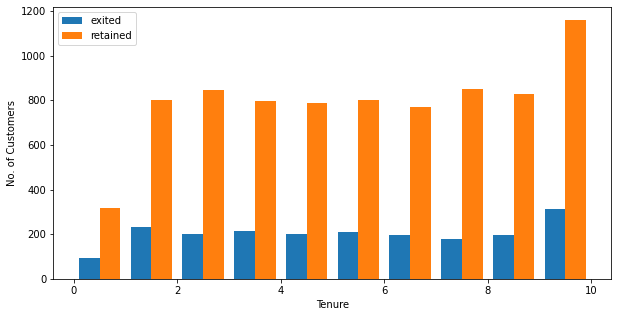

In [103]:
visiualize(df_tenure_exited,df_tenure_Noexited,"Tenure")

In [105]:
states = pd.get_dummies(df['Geography'],drop_first=True).astype(int)
gender = pd.get_dummies(df['Gender'],drop_first=True).astype(int)
df = pd.concat([df,gender,states],axis=1)

In [104]:
# df = pd.get_dummies(df,columns=['Geography','Gender'])

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [106]:
x = df.drop(['Exited','Geography','Gender'],axis = 1)

In [120]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0


In [107]:
X = df.drop(columns=['Exited'])  # Assuming 'Exited' is the target column
y = df['Exited']

In [108]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30)

In [109]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [110]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
# df.columns

In [113]:
# import keras
# from keras.models import Sequential
# from keras.layers import Dense
!pip install keras

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.2/1.2 MB 3.6 MB/s eta 0:00:00
     -------------------------------------- 274.7/274.7 KB 4.2 MB/s eta 0:00:00
     -------------------------------------- 133.7/133.7 KB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 3.6 MB/s eta 0:00:00
     -------------------------------------- 211.9/211.9 KB 3.2 MB/s eta 0:00:00
     -------------------------------------- 242.4/242.4 KB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 87.5/87.5 KB 1.6 MB/s eta 0:00:00
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.12.0
    Uninstalling Pygments-2.12.0:
      Successfully uninstalled Pygments-2.12.0


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [116]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 390.0/390.0 MB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 4.4/4.4 MB 2.9 MB/s eta 0:00:00
     -------------------------------------- 126.6/126.6 KB 7.3 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 71.9/71.9 KB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 26.4/26.4 MB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 3.8 MB/s eta 0:00:00
     -------------------------------------- 431.5/431.5 KB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 KB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 67.1/67.1 KB 3.6 MB/s eta 0:00:00
     -------------------------------------- 106.3/106.3 KB 6.0 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found exis

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mysql-connector-python 8.0.33 requires protobuf<=3.20.3,>=3.11.0, but you have protobuf 5.28.3 which is incompatible.
You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [124]:
classify = Sequential()
classify.add(Dense(activation="relu",input_dim = 11,units =6, kernel_initializer="uniform"))
classify.add(Dense(activation="relu",units =6, kernel_initializer="uniform"))
classify.add(Dense(activation="sigmoid",units =1, kernel_initializer="uniform"))
classify.compile(optimizer='adam',loss='binary_crossentropy',metrics=["accuracy"])

In [125]:
classify.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 6)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

In [126]:
classify.fit(x_train,y_train,batch_size=10,epochs = 50)

Epoch 1/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8097 - loss: 0.5593
Epoch 2/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7973 - loss: 0.4261
Epoch 3/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8075 - loss: 0.4068
Epoch 4/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8165 - loss: 0.4205
Epoch 5/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8323 - loss: 0.3978
Epoch 6/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8231 - loss: 0.4174
Epoch 7/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8298 - loss: 0.4181
Epoch 8/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8353 - loss: 0.4054
Epoch 9/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8298 - loss: 0.4059
Epoch 10/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8309 - loss: 0.4138
Epoch 11/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8288 - loss: 0.4199
Epoch 12/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

In [129]:
y_pred =classify.predict(x_test)
y_pred = (y_pred > 0.5)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [131]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      2379
           1       0.74      0.35      0.48       621

    accuracy                           0.84      3000
   macro avg       0.80      0.66      0.69      3000
weighted avg       0.83      0.84      0.82      3000



In [132]:
print(accuracy_score(y_test,y_pred))

0.8406666666666667


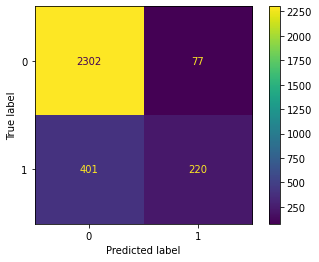

In [134]:
cm = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)
cmd.plot()